<a href="https://colab.research.google.com/github/inrisianturi178-netizen/praktikum-AI/blob/main/kelompok_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
print("Data Loaded:", df.shape)
df.head()


Saving Jumlah dan Persentase Penduduk Miskin Menurut Provinsi, 2024.csv to Jumlah dan Persentase Penduduk Miskin Menurut Provinsi, 2024.csv
Data Loaded: (39, 7)


,Provinsi,Garis Kemiskinan - Maret (Rp),Garis Kemiskinan - September (Rp),Jumlah Penduduk Miskin - Maret (ribu) (Ribu),Jumlah Penduduk Miskin - September (ribu) (Ribu),Persentase Penduduk Miskin - Maret,Persentase Penduduk Miskin - September
0,Aceh,661227,665855,804.53,718.96,14.23,12.64
1,Sumatera Utara,642423,648336,1228.01,1110.92,7.99,7.19
2,Sumatera Barat,708416,714991,345.73,315.43,5.97,5.42
3,Riau,697296,702620,492.25,473.04,6.67,6.36
4,Jambi,650115,658100,265.42,272.7,7.10,7.26


In [ ]:
df.columns = [
    'Provinsi',
    'Garis_Kemiskinan_Maret',
    'Garis_Kemiskinan_September',
    'Jumlah_Miskin_Maret',
    'Jumlah_Miskin_September',
    'Persentase_Miskin_Maret',
    'Persentase_Miskin_September'
]
df.head()

,Provinsi,Garis_Kemiskinan_Maret,Garis_Kemiskinan_September,Jumlah_Miskin_Maret,Jumlah_Miskin_September,Persentase_Miskin_Maret,Persentase_Miskin_September
0,Aceh,661227,665855,804.53,718.96,14.23,12.64
1,Sumatera Utara,642423,648336,1228.01,1110.92,7.99,7.19
2,Sumatera Barat,708416,714991,345.73,315.43,5.97,5.42
3,Riau,697296,702620,492.25,473.04,6.67,6.36
4,Jambi,650115,658100,265.42,272.7,7.10,7.26


In [ ]:
df['Kategori'] = df['Persentase_Miskin_Maret'].apply(lambda x: 1 if x > 10 else 0)
df.head()

,Provinsi,Garis_Kemiskinan_Maret,Garis_Kemiskinan_September,Jumlah_Miskin_Maret,Jumlah_Miskin_September,Persentase_Miskin_Maret,Persentase_Miskin_September,Kategori
0,Aceh,661227,665855,804.53,718.96,14.23,12.64,1
1,Sumatera Utara,642423,648336,1228.01,1110.92,7.99,7.19,0
2,Sumatera Barat,708416,714991,345.73,315.43,5.97,5.42,0
3,Riau,697296,702620,492.25,473.04,6.67,6.36,0
4,Jambi,650115,658100,265.42,272.7,7.10,7.26,0


In [ ]:
X = df[['Persentase_Miskin_Maret']].values
y = df['Kategori'].values

mean = X.mean()
std = X.std()
X_norm = (X - mean) / std

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
class Perceptron:
    def __init__(self, lr=0.01, epochs=200):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        self.bobot = np.zeros(X.shape[1] + 1)
        self.errors = []

        for _ in range(self.epochs):
            err = 0
            for xi, target in zip(X, y):
                xi_b = np.insert(xi, 0, 1)
                y_pred = 1 if np.dot(self.bobot, xi_b) >= 0 else 0
                update = self.lr * (target - y_pred)
                self.bobot += update * xi_b
                err += int(update != 0.0)
            self.errors.append(err)
        return self

    def predict(self, X):
        return np.array([
            1 if np.dot(self.bobot, np.insert(xi, 0, 1)) >= 0 else 0 for xi in X
        ])


Akurasi Perceptron: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



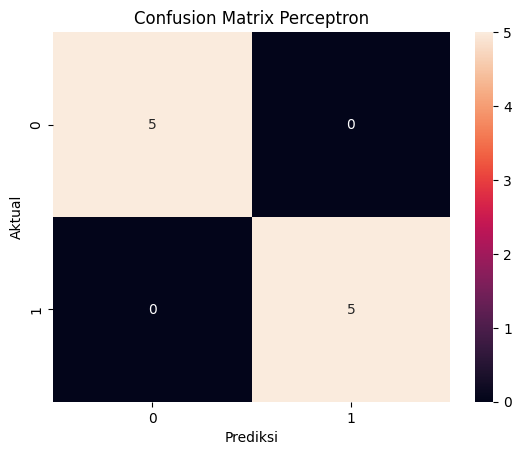

In [ ]:
perc = Perceptron(lr=0.01, epochs=500)
perc.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = perc.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Akurasi Perceptron: {:.2f}%".format(acc*100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix Perceptron")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()


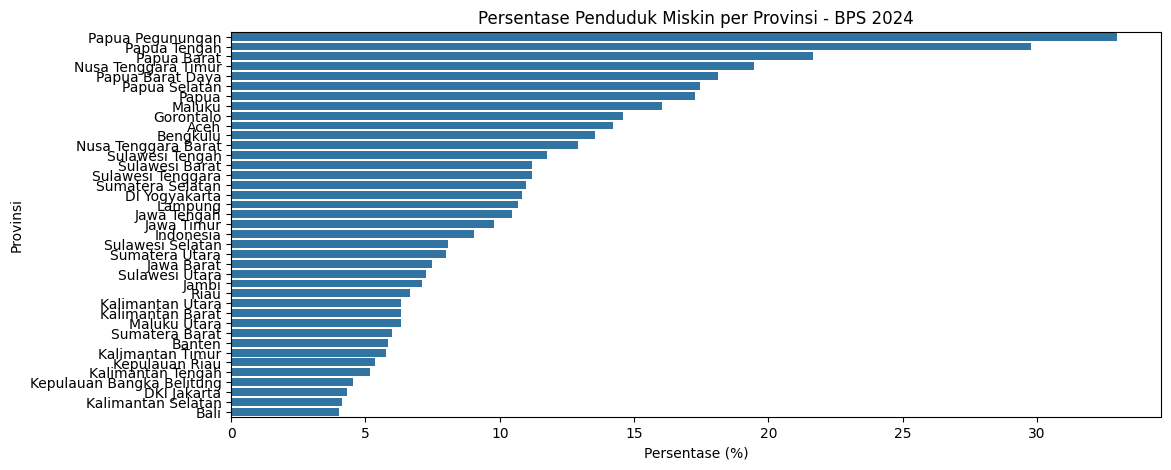

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(y='Provinsi', x='Persentase_Miskin_Maret', data=df.sort_values('Persentase_Miskin_Maret', ascending=False))
plt.title("Persentase Penduduk Miskin per Provinsi - BPS 2024")
plt.xlabel("Persentase (%)")
plt.ylabel("Provinsi")
plt.show()

In [ ]:
df['Prediksi'] = perc.predict((df[['Persentase_Miskin_Maret']].values - mean) / std)
df.to_csv("Hasil_Prediksi_Kemiskinan.csv", index=False)
files.download("Hasil_Prediksi_Kemiskinan.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>